# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Reizal Putra Hidayat
- **Email:** mohreizal27@gmail.com
- **ID Dicoding:** reizalputra

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan rental bike dalam musim-musim berbeda?
- Seberapa besar penuruan ketika cuaca buruk pada masing-masing pelanggan?
- Bagaimana pengaruh hari libur pada jumlah pelanggan?
- Bagaimana perilaku antara pelanggan casual dan registed?
- Seberapa banyak pelanggan casual dan registered yang merupakan pekerja?

## Import Semua Packages/Library yang Digunakan

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load dataset bike(day)

In [42]:
bike_day_df = pd.read_csv('./data/day.csv')
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load dataset bike(hour)

In [43]:
bike_hour_df = pd.read_csv('./data/hour.csv')
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset bike yang akan digunakan. dataset ini di import dari folder data
- Ada dua jenis data set yaitu bike_day_df dan bike_hour_df
- Dataset ini berasala dari [kagle-bike dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

### Assessing Data

##### Menilai data bike_day_df

In [44]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat type data yang salah dari colom dteday

In [45]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [46]:
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [47]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Sejauh ini tidak ada anomali seperti outlier

##### Menilai Data bike_hour_df

In [48]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [49]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [50]:
print("Jumlah duplikasi: ", bike_hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [51]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Sejauh ini tidak ada anomali seperti outlier sama seperti dataset bike_day

##### **Insight:**
- Dataset ini hanya memilih masalah type data pada column dteday yang salah
- tidak ada missing value, outlier dan anomali lain
- Dataset ini bisa dibilang berkualitas sangat baik
- Mungkin hanya nama coloumn yang akan diubah
- Karena kedua dataset hampir sama dan saya tidak akan menggunakan nilai hour untuk analisis ini make dataset bike hanya digunakan yang bagian day karena pada analisis ini tidak memerlukan hr/hour(jam)
- Nilai pada temp dan atemp memiliki nilai yang tidak berbeda jauh. Pada deskripsi dataset temp merupakan temperatur udara dan atemp merupakan temperatur yang dirasakan orang

### Cleaning Data

Karena data bike_hour tidak akan digunakan, maka akan dihapus untuk mengehmat memori

In [52]:
del bike_hour_df

Mengubah nama dataframe bike_hour_df menjadi bike_df. Untuk mempermudah dan persingkat nama

In [53]:
bike_df = bike_day_df
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengubah tipe data dari kolom dteday

In [54]:
bike_day_df['dteday'] = pd.to_datetime(bike_day_df.dteday)
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [55]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday']) 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Menghapus kolom yang tidak berguna
- atemp -> karena memiliki nilai yang hampir sama dengan temp
- instant -> karena hanya index
- workingday -> karena sudah ada holiday dan weekday

In [56]:
bike_df.drop(columns=['instant', 'workingday', 'atemp',], inplace=True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.436957,0.186900,82,1518,1600


Mengubah nama kolom menjadi nama yang lebih gampang dibaca agar mudah dimengerti

In [57]:
bike_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'total_rent'
}, inplace=True)
bike_df.head()

,date,season,year,month,holiday,weekday,weather_condition,temp,hum,windspeed,casual,registered,total_rent
0,2011-01-01,1,0,1,0,6,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.436957,0.186900,82,1518,1600


Mengganti value dari isi kolom menjadi value seperti deskripsi dataset agar mudah dianalisa dan dimengerti

In [58]:
print("month:", bike_df['month'].unique())
print("season:", bike_df['season'].unique())
print("weekday:", bike_df['weekday'].unique())
print("weather_condition:", bike_df['weather_condition'].unique())

month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
season: [1 2 3 4]
weekday: [6 0 1 2 3 4 5]
weather_condition: [2 1 3]


In [59]:
bike_df['month'] = bike_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
bike_df['season'] = bike_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
bike_df['weekday'] = bike_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
bike_df['weather_condition'] = bike_df['weather_condition'].map({
    1: 'Clear/mostly clear',
    2: 'Misty/Slightly overcast',
    3: 'Light precipitation'
})
bike_df.head()

,date,season,year,month,holiday,weekday,weather_condition,temp,hum,windspeed,casual,registered,total_rent
0,2011-01-01,Spring,0,Jan,0,Sat,Misty/Slightly overcast,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,Misty/Slightly overcast,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,Clear/mostly clear,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,Clear/mostly clear,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,Clear/mostly clear,0.226957,0.436957,0.186900,82,1518,1600


In [60]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               731 non-null    datetime64[ns]
 1   season             731 non-null    object        
 2   year               731 non-null    int64         
 3   month              731 non-null    object        
 4   holiday            731 non-null    int64         
 5   weekday            731 non-null    object        
 6   weather_condition  731 non-null    object        
 7   temp               731 non-null    float64       
 8   hum                731 non-null    float64       
 9   windspeed          731 non-null    float64       
 10  casual             731 non-null    int64         
 11  registered         731 non-null    int64         
 12  total_rent         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usag

Mengubah tipe data menjadi categories Karena tipe data nya tadinya int. hal ini untuk mengatasi hasil NaN

In [61]:
bike_df['season'] = bike_df.season.astype('category')
bike_df['month'] = bike_df.month.astype('category')
bike_df['weekday'] = bike_df.weekday.astype('category')
bike_df['weather_condition'] = bike_df.weather_condition.astype('category')
bike_df.head()

,date,season,year,month,holiday,weekday,weather_condition,temp,hum,windspeed,casual,registered,total_rent
0,2011-01-01,Spring,0,Jan,0,Sat,Misty/Slightly overcast,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,Misty/Slightly overcast,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,Clear/mostly clear,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,Clear/mostly clear,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,Clear/mostly clear,0.226957,0.436957,0.186900,82,1518,1600


In [62]:
bike_df.describe()

,year,holiday,temp,hum,windspeed,casual,registered,total_rent
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,0.028728,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.500342,0.167155,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,0.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,1.000000,0.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,1.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Menghapus column atemp karena memiliki nilai yang hampir sama dengan temp agar menghemat memori
- Menghapus colomn workingday karena sudah ada coloumn holiday dan weekday
- Menghapus column instant karena tidak dipakai untuk analisis
- Menganti nama column dengan nama yang lebih mudah dibaca dan dimengerti
- Mengganti value pada column season, month, weekday agar lebih mudah dipahami dan dianalisis

## Exploratory Data Analysis (EDA)

### Explore data bike_day_df

Explore data dari nilai yang bisa paling mudah dilihat dan mencari jumlah pelanggan terbesar berdasarkan year, season, month.

In [63]:
bike_df.groupby(by="year").agg({
    'total_rent': ['max', 'min', 'mean', 'sum']
})

total_rent                           
            max  min         mean      sum
year                                      
0          6043  431  3405.761644  1243103
1          8714   22  5599.934426  2049576

Terlihat bahwanya dari tahun 2011 ke 2012 mengalami kenaikan

In [64]:
bike_df.groupby(by="season").agg({
    'total_rent': ['max', 'min', 'mean', 'sum']
})

total_rent                            
              max   min         mean      sum
season                                       
Fall         8714  1115  5644.303191  1061129
Spring       7836   431  2604.132597   471348
Summer       8362   795  4992.331522   918589
Winter       8555    22  4728.162921   841613

Musim *fall* menjadi musin yang paling banyak Pelanggan

In [66]:
bike_df.groupby(by="month").agg({
    'total_rent': ['max', 'min', 'mean', 'sum']
})

total_rent                           
             max   min         mean     sum
month                                      
Apr         7460   795  4484.900000  269094
Aug         7865  1115  5664.419355  351194
Dec         6606   441  3403.806452  211036
Feb         5062  1005  2655.298246  151352
Jan         4521   431  2176.338710  134933
Jul         8173  3285  5563.677419  344948
Jun         8120  3767  5772.366667  346342
Mar         8362   605  3692.258065  228920
May         8294  2633  5349.774194  331686
Nov         6852  1495  4247.183333  254831
Oct         8156    22  5199.225806  322352
Sep         8714  1842  5766.516667  345991

Pelanggan lebih banyak pada bulan agustus

In [67]:
bike_df.groupby(by="holiday").agg({
    'total_rent': ['max', 'min', 'mean', 'sum']
})

total_rent                            
               max   min         mean      sum
holiday                                       
0             8714    22  4527.104225  3214244
1             7403  1000  3735.000000    78435

Pelanggan juga lebih banyak saat bukan hari libur ketimbang hari libur

In [68]:
bike_df.groupby(by="weekday").agg({
    'total_rent': ['max', 'min', 'mean', 'sum']
})

total_rent                           
               max   min         mean     sum
weekday                                      
Fri           8362  1167  4690.288462  487790
Mon           7525    22  4338.123810  455503
Sat           8714   627  4550.542857  477807
Sun           8227   605  4228.828571  444027
Thu           7804   431  4667.259615  485395
Tue           7767   683  4510.663462  469109
Wed           8173   441  4548.538462  473048

Hari jumat merupakan hari yang paling banyak pelanggannya

In [69]:
bike_df.groupby(by="weather_condition").agg({
    'total_rent': ['max', 'min', 'mean', 'sum']
})

total_rent                           
                               max  min         mean      sum
weather_condition                                            
Clear/mostly clear            8714  431  4876.786177  2257952
Light precipitation           4639   22  1803.285714    37869
Misty/Slightly overcast       8362  605  4035.862348   996858

Tentu saja saat cuaca bagus akan lebih banyak pelanggannya

Mencari lebih detail dari data

In [70]:
bike_df.groupby(by=["season"]).agg({
    'registered': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'total_rent': ['max', 'min', 'mean', 'sum']
})

registered                           casual                            \
              max  min         mean     sum    max  min         mean     sum   
season                                                                         
Fall         6917  889  4441.691489  835038   3160  118  1202.611702  226091   
Spring       5315  416  2269.204420  410726   3155    9   334.928177   60622   
Summer       6456  674  3886.233696  715067   3410  120  1106.097826  203522   
Winter       6946   20  3999.050562  711831   3031    2   729.112360  129782   

       total_rent                              
              max   min         mean      sum  
season                                         
Fall         8714  1115  5644.303191  1061129  
Spring       7836   431  2604.132597   471348  
Summer       8362   795  4992.331522   918589  
Winter       8555    22  4728.162921   841613

Pelanggan "registered" ternyata lumayan loyal walaupun terdapat berbeda musim, dibandingkan casual.

In [71]:
bike_df.groupby(by=["season", "year"]).agg({
    'total_rent': ['max', 'min', 'mean', 'sum']
})

total_rent                           
                   max   min         mean     sum
season year                                      
Fall   0          6043  1115  4464.361702  419650
       1          8714  4073  6824.244681  641479
Spring 0          3239   431  1666.666667  150000
       1          7836   441  3531.296703  321348
Summer 0          5805   795  3775.173913  347316
       1          8362  1027  6209.489130  571273
Winter 0          5511   627  3664.460674  326137
       1          8555    22  5791.865169  515476

In [72]:
bike_df.groupby(by="holiday").agg({
    'registered': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'total_rent': ['max', 'min', 'mean', 'sum']
})

registered                            casual                    \
               max  min         mean      sum    max  min         mean   
holiday                                                                  
0             6946   20  3685.332394  2616586   3410    2   841.771831   
1             5172  573  2670.285714    56076   3065  117  1064.714286   

                total_rent                              
            sum        max   min         mean      sum  
holiday                                                 
0        597658       8714    22  4527.104225  3214244  
1         22359       7403  1000  3735.000000    78435

pada saat liburan memang lebih sedikit dari pelanggan registerd maupun casual

In [73]:
bike_df.corr(numeric_only=True)

,year,holiday,temp,hum,windspeed,casual,registered,total_rent
year,1.000000,0.007954,0.047604,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.007954,1.000000,-0.028556,-0.015937,0.006292,0.054274,-0.108745,-0.068348
temp,0.047604,-0.028556,1.000000,0.126963,-0.157944,0.543285,0.540012,0.627494
hum,-0.110651,-0.015937,0.126963,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.011817,0.006292,-0.157944,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.248546,0.054274,0.543285,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.594248,-0.108745,0.540012,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_rent,0.566710,-0.068348,0.627494,-0.100659,-0.234545,0.672804,0.945517,1.000000


**Insight:**
- Sejauh ini kita mendapatkan banyak informasi tentang kapan pelanggan terbanyak pada rentang tahun, bulan, hari, musim dan cuaca
- Pelanggan sejauh ini lebih banyak pada hari kerja atau bukan hari libur
- Dan temp lumayan mempengaruhi pelanggan
- pelanggan "registered" cendrung lebih loyal walaupun dalam musim berbeda dibandingkan casual

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren rental bike dalam 2011 dan 2012


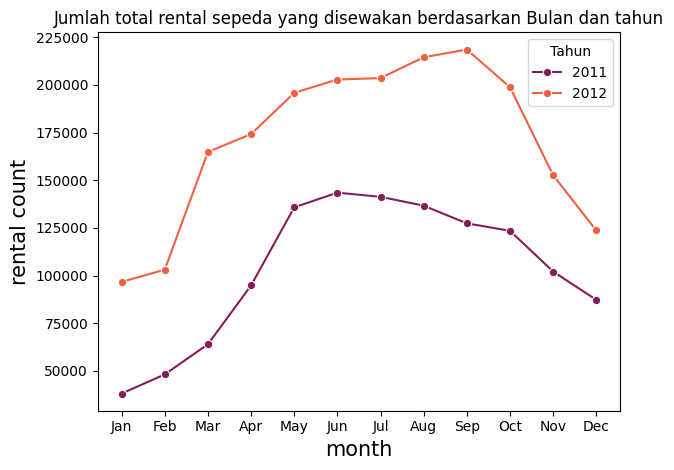

In [74]:
bike_df['month'] = pd.Categorical(
    bike_df['month'], 
    categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True
)
bike_df['year_label'] = bike_df['year'].map({0: '2011', 1: '2012'})
monthly_counts = bike_df.groupby(by=["month", "year_label"]).agg({
    "total_rent": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="total_rent",
    hue="year_label",
    style="year_label",
    marker='o',
    dashes=False,
    palette="rocket"
)
plt.title("Jumlah total rental sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel("month", size=15)
plt.ylabel("rental count", size =15)
plt.legend(title="Tahun")
plt.tight_layout()
plt.show()

Berdasarkan grafik lineplot diatas penjualan pada tahun 2012 lebih tinggi dibandingkan 2011, hal ini menunjukan bahwa tren bike rental menaik dari tahun sebelumnya. Pada 2012 puncak nya terdapat pada bulan september dan paling sedikit pada bulan januari. Sedangkan, pada tahun 2011 puncak terjadi pada bulan juni dan tersepi pada januari juga.

### Pertanyaan 2: Seberapa besar penuruan ketika cuaca buruk pada masing-masing pelanggan?

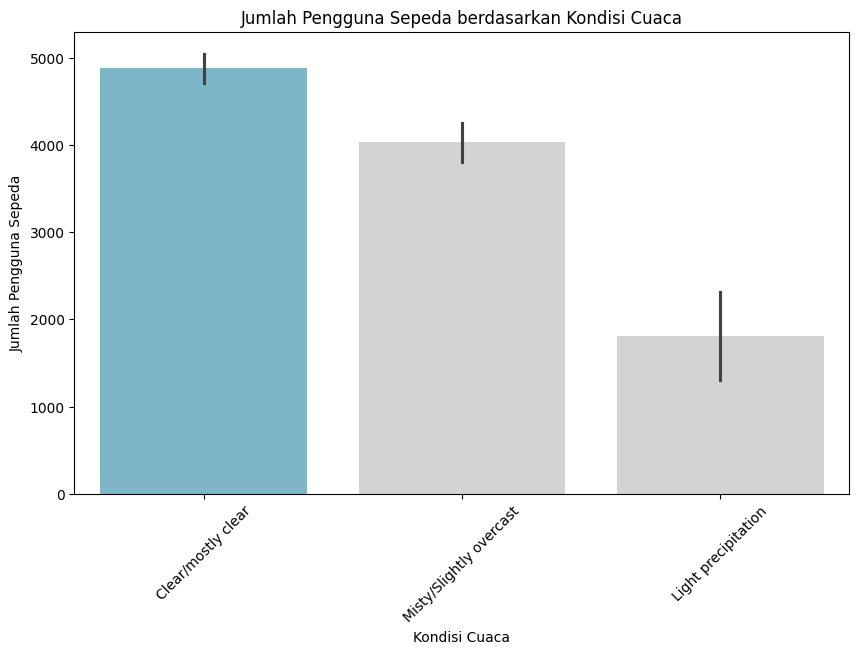

In [85]:
plt.figure(figsize=(10,6))
weather_order = bike_df.groupby('weather_condition')['total_rent'].sum().sort_values(ascending=False).index
sns.barplot(
    x='weather_condition',
    y='total_rent',
    data=bike_df,
    order=weather_order,
    hue='weather_condition',
    palette = ["#72BCD4", "#D3D3D3", "#D3D3D3"])

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()
     

Bisa dilihat dari bar diatas bahwasanya terjadi penurunan lebih dari 50% ketika cuaca buruk. hal ini dapat disimpulkan bahwa cuaca memainkan peran yang sangat berpengaruh dalam rental bike

### Pertanyaan 3: Bagaimana kondisi saat holiday, weekend dan hari-hari lain pada jumlah pelanggan?

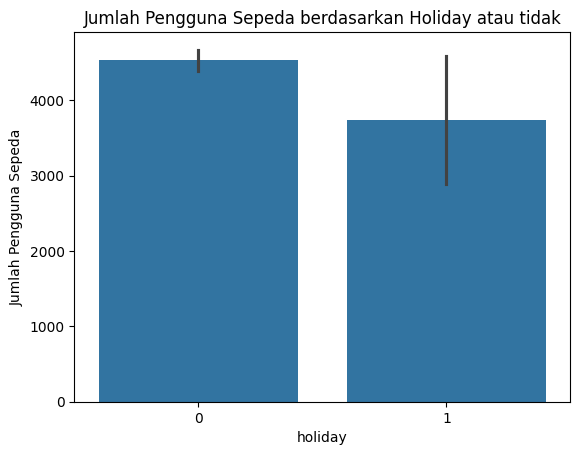

In [76]:
sns.barplot(
    x='holiday',
    y='total_rent',
    data=bike_df)
plt.title('Jumlah Pengguna Sepeda berdasarkan Holiday atau tidak')
plt.xlabel('holiday')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Jika menurut bar diatas, saat holiday justru pelanggan lebih sedikit dari saat bukan holiday walau tidak begitu besar perbedaanya. Untuk mengetahui penjualan berdasarkan hari, divisualisasikan sebagai berikut:

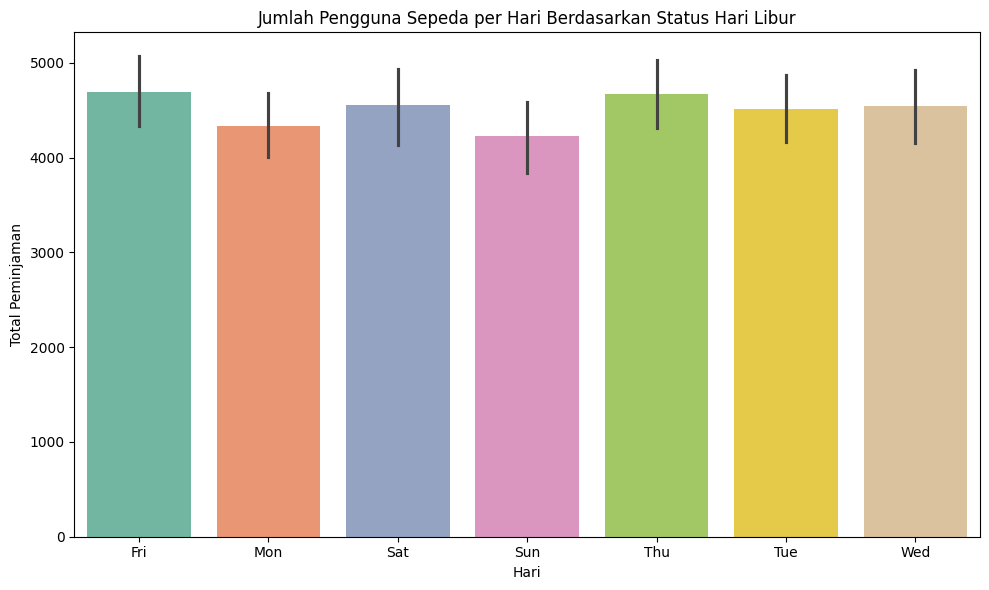

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='total_rent',
    data=bike_df.sort_values(by='total_rent'),
    hue='weekday',
    palette='Set2'
)

plt.title('Jumlah Pengguna Sepeda per Hari Berdasarkan Status Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Total Peminjaman')
plt.tight_layout()
plt.show()


Dapat dilihat bahwa saat hari weekend(sabtu dan minggu) tidak terdapat perbedaan yang besar. Begitu juga dengan perbedaan menurut hari-hari yang lain. Hal ini menunjukan bahwa pelanggan rental bike cukup stabil dalam sehari-hari, tidak terpaku pada weekend atau weekday. Tetapiperlu dilihat juga bahwa paling tinggi terdapat pada hari Fri(jumat) dan Sun(senin) untuk terendah.

Dapat disimpulkan bahwa kondisi saat holiday dan weekend malah lebih sedikit dibandingkan hari biasa(weekday).

### Pertanyaan 4: Bagaimana perilaku antara pelanggan casual dan registed?

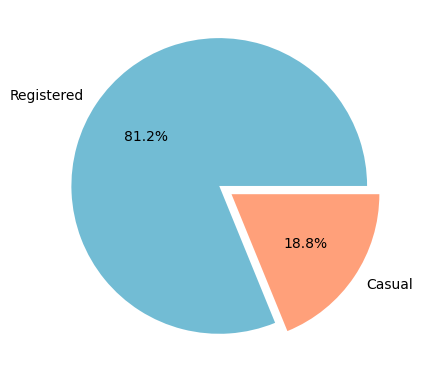

In [78]:
plt.pie(
    x=[bike_df['registered'].sum(),bike_df['casual'].sum()],
    labels=['Registered', 'Casual'],
    autopct='%1.1f%%',
    colors=["#72BCD4","#FFA07A"],
    explode=[0.1,0]
)
plt.show()

Jumlah dari pelangan Registered lebih banyak daripada Casual hampir 8:2, yang dimana ini lumayan jauh. Untuk mencari perilaku dilakakan analisa jumlah pelanggan terhadap berbagai situasi seperti keadaan cuaca dan musim.

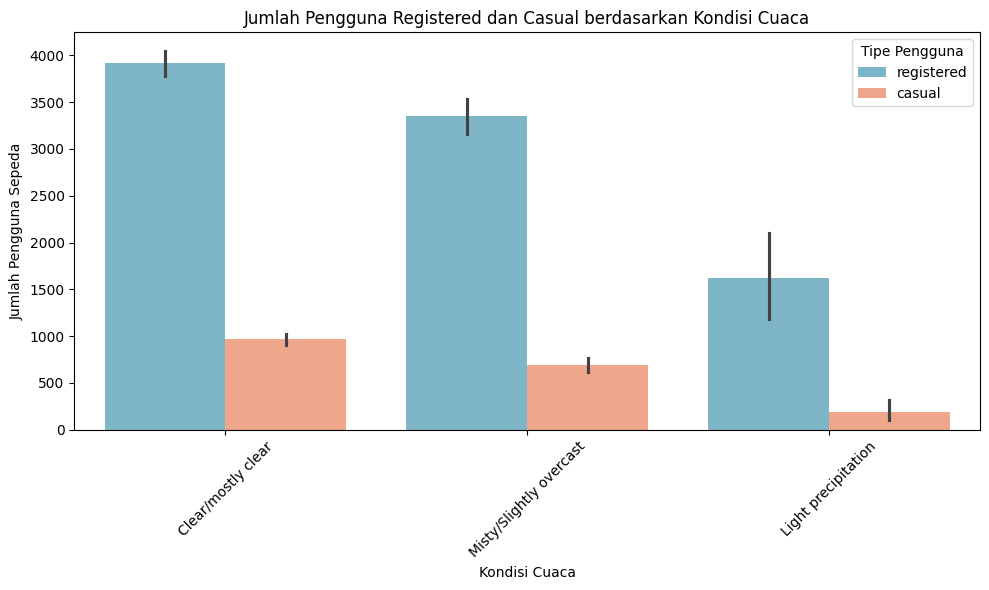

In [88]:
melted_df = pd.melt(
    bike_df,
    id_vars='weather_condition',
    value_vars=['registered', 'casual'],
    var_name='user_type',
    value_name='count'
)
weather_order = bike_df.groupby('weather_condition')[['registered', 'casual']].sum().sum(axis=1).sort_values(ascending=False).index
plt.figure(figsize=(10,6))
sns.barplot(
    data=melted_df,
    x='weather_condition',
    y='count',
    hue='user_type',
    order=weather_order,
    palette=['#72BCD4', '#FFA07A'] 
)
plt.title('Jumlah Pengguna Registered dan Casual berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend(title='Tipe Pengguna')
plt.tight_layout()
plt.show()


Pada berbagai cuaca juga jumlah registered lebih banyak daripada casual

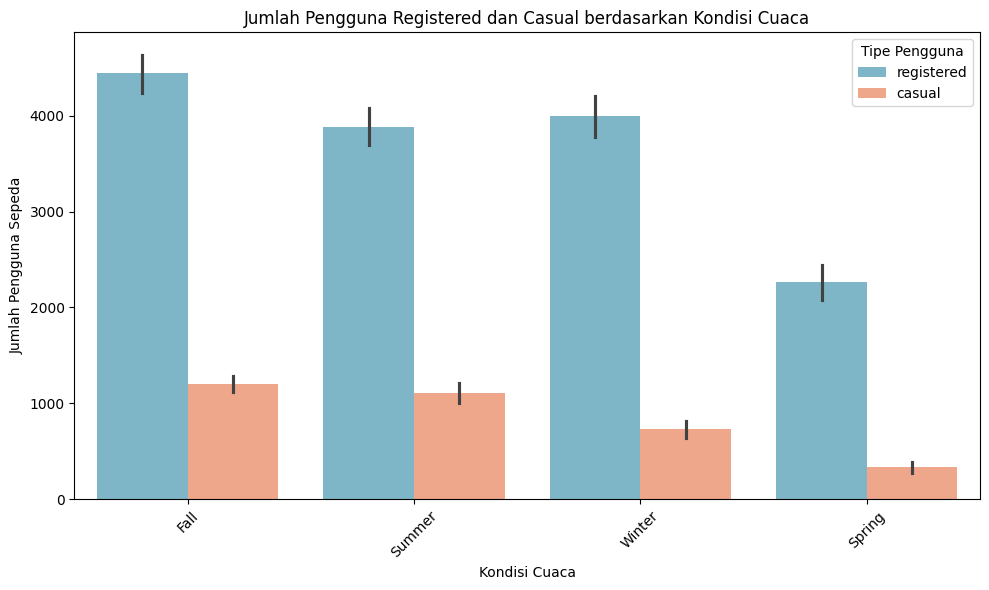

In [80]:
melted_df = pd.melt(
    bike_df,
    id_vars='season',
    value_vars=['registered', 'casual'],
    var_name='user_type',
    value_name='count'
)
weather_order = bike_df.groupby('season')[['registered', 'casual']].sum().sum(axis=1).sort_values(ascending=False).index
plt.figure(figsize=(10,6))
sns.barplot(
    data=melted_df,
    x='season',
    y='count',
    hue='user_type',
    order=weather_order,
    palette=['#72BCD4', '#FFA07A'] 
)
plt.title('Jumlah Pengguna Registered dan Casual berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend(title='Tipe Pengguna')
plt.tight_layout()
plt.show()


Pada berbagai musim registered juga cendrung lebih banyak. Registered pada musim *winter* sedikit lebih banyak daripada *summmer*, yang mana pola ini berbeda dengan casual. Dan pada perbandingan dari jumlah pelanggan yang paling banyak sampai terkecil pada berbagai musim, resgitered lebih stabil dan tidak turun banyak

Berdasarkan data yang ditunjukan prilaku registred dan casual sama-sama setia atau *royal*, walaupun lebih banyak registred dari jumlah dan konsistennya pada berbagai situasi(cuaca dan musin).

## Conclusion

- Conclution pertanyaan 1 : Dari grafik visualisasi terlihat jelas bahwa tren dari tahun 2011 ke 2012 mengalami kenaikan secara keseluruhan. Untuk **puncak** terdapat perbedaan bulan yakni **Sep** untuk 2012 dan **jun** untuk 2011. Sedangkan, **terendah** sama-sama dibulan **januari**.
- Conclution pertanyaan 2 : Kondisi **cuaca** lumayan mempengaruhi pelanggan. Berdasarkan hasil analisa, Pelanggan lebih menyukai cuaca bagus atau cerah. Pada cuaca yang buruk terlihat bahwa terjadi penurunan yang cukup besar. Hal ini membuktikan bahwa **cuaca** bermain peran yang sangat mempengaruhi rental bike(penjualan).
- Conclution pertanyaan 3 : Pada hari **weekend** dan **weekday**, Pelanggan Lebih banyak pada bukan hari libur atau **Holiday**. Dan puncak atau tertinggi jatuh pada hari **Fri(jumat)**, **Sun(senin)** yang terendah. Walaupun begitu **weekend** tetap lumayan untuk jumlah rental. Tetapi tetap saja **Weekday** atau bukan hari libur **Holiday** merupakan hari-hari yang cendrung lebih banyak pelanggan.
- Conclution pertanyaan 4 : Berdasarkan visualisasi dari kondisi cuaca, musim. **Registered** dan ****casual**** terlihat tidak berbeda jauh. Tetapi pada bagian musim *winter* bagian **registered** ternyata bukan yang terendah ke 3 dibandingkan 3 musim lainnya. Hal ini berbeda dengan **casual**, yang terendah dimana musim *winter* merupakan terendah ke 3. Hal ini dapat membuktikan bahwa ada sedikit perbedaan perilaku **registered** dan **casual**

In [89]:
bike_df.to_csv("./dashboard/main_data.csv", index=False)